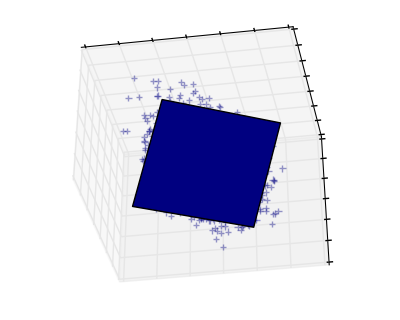

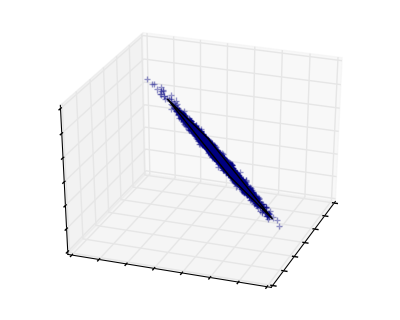

In [1]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# #############################################################################
# Create the data
e = np.exp(1)
np.random.seed(4)
def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
        + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))
density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)
density *= pdf_z
a = x + y
b = 2 * y
c = a - b + z
norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm
# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)
    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]
    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)
    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_
    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

elev = -40
azim = -80
plot_figs(1, elev, azim)
elev = 30
azim = 20
plot_figs(2, elev, azim)
plt.show()

In [2]:
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
print(X1, X2)

[[-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 ...
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]
 [-1.5        -1.43877551 -1.37755102 ...  1.37755102  1.43877551
   1.5       ]] [[-1.5        -1.5        -1.5        ... -1.5        -1.5
  -1.5       ]
 [-1.43877551 -1.43877551 -1.43877551 ... -1.43877551 -1.43877551
  -1.43877551]
 [-1.37755102 -1.37755102 -1.37755102 ... -1.37755102 -1.37755102
  -1.37755102]
 ...
 [ 1.37755102  1.37755102  1.37755102 ...  1.37755102  1.37755102
   1.37755102]
 [ 1.43877551  1.43877551  1.43877551 ...  1.43877551  1.43877551
   1.43877551]
 [ 1.5         1.5         1.5        ...  1.5         1.5
   1.5       ]]


In [ ]:
print(__doc__)
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
try: # SciPy >= 0.16 have face in misc
f scipy.misc import face
 ace face(gray=True)
except ImportError:
face = sp.face(gray=True)
# Convert from uint8 representation with values between 0 and 255 to
# a floating point representation with values between 0 and 1.
face = face / 255.
# downsample for higher speed
face = face[::2, ::2] + face[1::2, ::2] + face[::2, 1::2] + face[1::2, 1::2]
face /= 4.0
height, width = face.shape
# Distort the right half of the image
print('Distorting image...')
distorted = face.copy()
distorted[:, width // 2:] += 0.075 * np.random.randn(height, width // 2)
# Extract all reference patches from the left half of the image
print('Extracting reference patches...')
t0 = time()
patch_size = (7, 7)
data = extract_patches_2d(distorted[:, :width // 2], patch_size)
data = data.reshape(data.shape[0], -1)
data -= np.mean(data, axis=0)
data /= np.std(data, axis=0)
print('done in %.2fs.' % (time() - t0))
# #############################################################################
# Learn the dictionary from reference patches
print('Learning the dictionary...')
t0 = time()
dico = MiniBatchDictionaryLearning(n_components=100, alpha=1, n_iter=500)
V = dico.fit(data).components_
dt = time() - t0
print('done in %.2fs.' % dt)
plt.figure(figsize=(4.2, 4))
for i, comp in enumerate(V[:100]):
plt.subplot(10, 10, i + 1)
plt.imshow(comp.reshape(patch_size), cmap=plt.cm.gray_r,
interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.suptitle('Dictionary learned from face patches\n' +
'Train time %.1fs on %d patches' % (dt, len(data)),
fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
# #############################################################################
# Display the distorted image
def show_with_diff(image, reference, title):
"""Helper function to display denoising"""
plt.figure(figsize=(5, 3.3))
plt.subplot(1, 2, 1)
plt.title('Image')
plt.imshow(image, vmin=0, vmax=1, cmap=plt.cm.gray,
interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.subplot(1, 2, 2)
difference = image - reference
plt.title('Difference (norm: %.2f)' % np.sqrt(np.sum(difference ** 2)))
plt.imshow(difference, vmin=-0.5, vmax=0.5, cmap=plt.cm.PuOr,
interpolation='nearest')
plt.xticks(())
plt.yticks(())
plt.suptitle(title, size=16)
plt.subplots_adjust(0.02, 0.02, 0.98, 0.79, 0.02, 0.2)
show_with_diff(distorted, face, 'Distorted image')
# #############################################################################
# Extract noisy patches and reconstruct them using the dictionary
print('Extracting noisy patches... ')
t0 = time()
data = extract_patches_2d(distorted[:, width // 2:], patch_size)
data = data.reshape(data.shape[0], -1)
intercept = np.mean(data, axis=0)
data -= intercept
print('done in %.2fs.' % (time() - t0))
transform_algorithms = [
('Orthogonal Matching Pursuit\n1 atom', 'omp',
{'transform_n_nonzero_coefs': 1}),
('Orthogonal Matching Pursuit\n2 atoms', 'omp',
{'transform_n_nonzero_coefs': 2}),
('Least-angle regression\n5 atoms', 'lars',
{'transform_n_nonzero_coefs': 5}),
('Thresholding\n alpha=0.1', 'threshold', {'transform_alpha': .1})]
reconstructions = {}
for title, transform_algorithm, kwargs in transform_algorithms:
print(title + '...')
reconstructions[title] = face.copy()
t0 = time()
dico.set_params(transform_algorithm=transform_algorithm, **kwargs)
code = dico.transform(data)
patches = np.dot(code, V)
patches += intercept
patches = patches.reshape(len(data), *patch_size)
if transform_algorithm == 'threshold':
 pathes -= patches.min()
patches /= patches.max()
reconstructions[title][:, width // 2:] = reconstruct_from_patches_2d(
patches, (height, width // 2))
dt = time() - t0
print('done in %.2fs.' % dt)
show_with_diff(reconstructions[title], face,
title + ' (time: %.1fs)' % dt)
plt.show()